First cell is necessary for running this notebook with django env (as if it was executed from an API call).

In [2]:
import os, sys
DJANGO_ROOT = os.path.abspath(os.path.join(os.getcwd(),'../../'))
sys.path.insert(0,DJANGO_ROOT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

In [3]:
import numpy as np
import tqdm
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt


import python.stl10_input as STL10
import os

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [4]:
from app.models import Image

# Inspect data

Load data:

In [6]:
def format_path(root,path):
    return os.path.abspath(os.path.join(root,path))

In [7]:
DATA_ROOT=format_path(DJANGO_ROOT,'./scripts/data')

DATA_PATH = format_path(DATA_ROOT,'./train_X.bin') 
LABEL_PATH = format_path(DATA_ROOT,'./train_y.bin')
PROCESSED_PATH = format_path(DATA_ROOT,'./processed_train_X.npy')

In [8]:
x_inp = STL10.read_all_images(DATA_PATH)
label = STL10.read_labels(LABEL_PATH)
x_processed = np.load(PROCESSED_PATH)

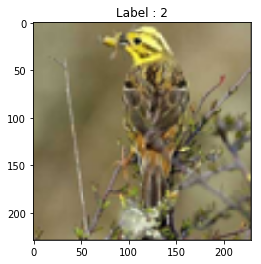

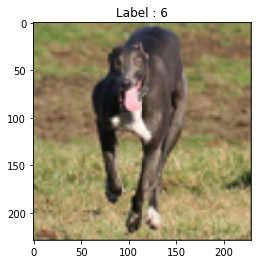

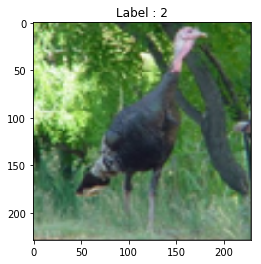

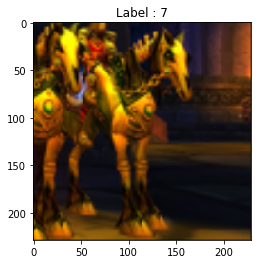

In [10]:
for index, (img,vec,y) in enumerate(zip(x_inp ,x_processed, label)):    
    test_img = resize(img,(229,229), mode = 'constant')
    plt.imshow(test_img)
    plt.title('Label : {}'.format(y))
    plt.show()
    if index >= 3:
        break

# Database populate notebook

Migrate data:

In [7]:
from imageio import imsave
import pickle as pckl
from app.models import Image
import codecs

In [8]:
IMAGE_ROOT = 'static/img/recdemo'
IMAGE_NAME = 'id@{}.png'

In [9]:
def obj2pickled(obj):
    return codecs.encode(pckl.dumps(obj), "base64").decode()

def pickled2obj(pickled):
    return pckl.loads(codecs.decode(pickled.encode(), "base64"))

In [10]:
for index, (img,vec,y) in tqdm.tqdm(enumerate(zip(x_inp ,x_processed, label))):    
    test_img = resize(img,(229,229), mode = 'constant')
    # 1. Determinate path for the next image
    path = os.path.join( IMAGE_ROOT, IMAGE_NAME.format(index))
    imsave(os.path.join( DJANGO_ROOT, path) , test_img)
    # 2. Pickle the vector
    vec_p = obj2pickled(vec)
    # 3. Save path + vec + label as record in DB
    img = Image(index+1, path, y, vec_p)
    img.save()

0it [00:00, ?it/s]/media/vribic/DATA/linux/ubuntu_mate/home/projects/webdev/heroku_django/project/venv/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
5000it [07:50, 10.62it/s]
